# PCA and K-Means Clustering of Credit Card Dataset

Prints many statements at same time using the below command

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# Importing the required Libraries

In [2]:
from matplotlib import pyplot as plt
import collections
import warnings
import pandas_profiling
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics
import pandas as pd


In [3]:
from sklearn.preprocessing import MinMaxScaler
import graphviz

# Reading the CSV file from the machine

In [4]:
df= pd.read_excel("D:\Module3_RP\Session1\Credit.xlsx", sep=',')

In [5]:
df.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
df.shape

(400, 11)

In [7]:
#Separating categorical and numerical variables
num = df.iloc[:,[0,1,2,3,4,5,10]]
cat = df.iloc[:,6:10]
num.head()
cat.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


,Gender,Student,Married,Ethnicity
0,Male,No,Yes,Caucasian
1,Female,Yes,Yes,Asian
2,Male,No,No,Asian
3,Female,No,No,Asian
4,Male,No,Yes,Caucasian


# EDA report using Pandas Profiling

In [8]:
eda_report = pandas_profiling.ProfileReport(df)


In [9]:
eda_report.to_file("Credit_EDA.html")

# Dummy Coding


Assigning numerical codes to the categorical data; below code looks for the column with OBJECT datatype, and assign the codes

In [10]:
dummy_df = pd.get_dummies(cat)
dummy_df.head()

,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0,1,1,0,0,1,0,0,1
1,1,0,0,1,0,1,0,1,0
2,0,1,1,0,1,0,0,1,0
3,1,0,1,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0,1


# Standardization

Scaling all the values  between 0 to 1 using MinMaxScaler. This brings all the data with different dimensions to common format.

In [11]:
#scale all values between0 and 1
scld=MinMaxScaler(feature_range=(0,1))

In [12]:
arr_scld=scld.fit_transform(num)

C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
arr_scld

array([[0.02573746, 0.21067545, 0.21372328, ..., 0.14666667, 0.4       ,
        0.16658329],
       [0.54272181, 0.44340634, 0.43869516, ..., 0.78666667, 0.66666667,
        0.45172586],
       [0.53459837, 0.47633635, 0.4735658 , ..., 0.64      , 0.4       ,
        0.29014507],
       ...,
       [0.26955979, 0.25394394, 0.25646794, ..., 0.58666667, 0.46666667,
        0.06903452],
       [0.15528704, 0.12789095, 0.11136108, ..., 0.28      , 0.53333333,
        0.        ],
       [0.04735081, 0.35755858, 0.36220472, ..., 0.54666667, 0.13333333,
        0.48324162]])

In [14]:
num_scld=pd.DataFrame(arr_scld,columns=num.columns)
num_scld.head()
num_scld.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,0.166583
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,0.451726
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,0.290145
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,0.482241
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,0.165583


,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.197781,0.297182,0.294646,0.244688,0.435567,0.563333,0.260138
std,0.199933,0.176765,0.174043,0.171409,0.229997,0.208347,0.229994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060434,0.171006,0.173510,0.125000,0.250000,0.400000,0.034392
50%,0.129121,0.288520,0.282340,0.250000,0.440000,0.600000,0.229865
75%,0.267284,0.384266,0.387233,0.375000,0.626667,0.733333,0.431716
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#combining the Categorical and Numerical variables together
df_final = pd.concat([num_scld,dummy_df], axis=1)
df_final.head()
df_final.shape

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,0.166583,0,1,1,0,0,1,0,0,1
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,0.451726,1,0,0,1,0,1,0,1,0
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,0.290145,0,1,1,0,1,0,0,1,0
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,0.482241,1,0,1,0,1,0,0,1,0
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,0.165583,0,1,1,0,0,1,0,0,1


(400, 16)

# Principal Component Analysis

PCA reduces the number of variables to lesser new variables , which explains most of the original Data variances

fitting the PCA model on to the standarized and dummy coded values 

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_final)

In [17]:
pca


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca.explained_variance_ratio_

array([2.44092574e-01, 2.34071868e-01, 1.82324676e-01, 1.19341327e-01,
       8.86373985e-02, 6.02929031e-02, 2.54631270e-02, 2.08160776e-02,
       1.45958486e-02, 9.96949999e-03, 3.63187082e-04, 3.15134472e-05,
       1.10907531e-32, 4.97694722e-33, 2.40426671e-33, 1.52969465e-33])

explained_variance_ratio gives an array of parameters which describes the variances with respect all the variables.

To find out the Optimal number of Parmeters, Elbow Plot is plotted against the Cumulative Variances

# Optimal Number of Parameters using Elbow Plot

In [19]:
#Plotting relation between compnents and variance(Elbow method)
import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 0, 'number of component')

Text(0, 0.5, 'Cummulative explaind Variance')

Text(5, 0.86, 'right number of components')

Text(11, 1.0, 'total number of components')

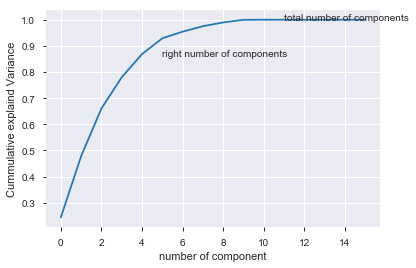

In [20]:
#Plotting relation between compnents and variance(Elbow method)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of component')
plt.ylabel('Cummulative explaind Variance')
plt.annotate('right number of components',xy=(5,0.86))
plt.annotate('total number of components',xy=(11,1.0))


From the above cure, we can see the bend is at 5, hence 5 is the Optimal Number of Parameters

In [21]:
str(pca.explained_variance_ratio_.sum())


'1.0'

# Finding the 5 Optimal Number of Parameters

In [22]:
pca= PCA(5).fit(df_final)

In [23]:
np.round(pca.explained_variance_ratio_[0:5]*100,2)


array([24.41, 23.41, 18.23, 11.93,  8.86])

In [24]:
str(pca.explained_variance_ratio_.sum())


'0.8684678431868091'

The sum of the explained variance ratio should be > 80%. Here it is 86.84. This also signifies that the Optimal Parmeters should be 5.

Text(0.5, 0, 'number of component')

Text(0, 0.5, 'Cummulative explaind Variance')

Text(5, 0.86, 'right number of components')

Text(11, 1.0, 'total number of components')

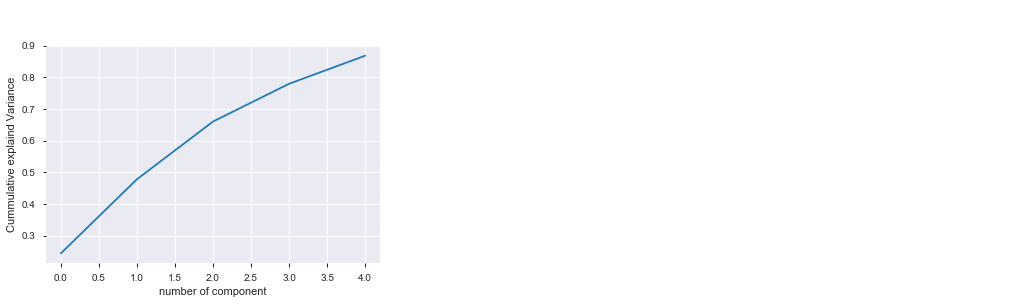

In [25]:
#Plotting relation between compnents and variance(Elbow method)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of component')
plt.ylabel('Cummulative explaind Variance')
plt.annotate('right number of components',xy=(5,0.86))
plt.annotate('total number of components',xy=(11,1.0))

In [26]:
#create DataFrame of Components
pca_df = pd.DataFrame(pca.components_, columns = df_final.columns)
pca_df

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,-0.000580,-0.005068,-0.005218,0.006230,0.007983,-0.003908,-0.009007,-0.671496,0.671496,0.022114,-0.022114,0.211659,-0.211659,0.047404,-0.068348,0.020945
1,-0.009448,-0.005997,-0.007123,0.000367,0.027757,-0.013858,0.008573,0.214536,-0.214536,-0.060382,0.060382,0.660900,-0.660900,0.129855,-0.081859,-0.047996
2,0.008461,0.002170,0.001670,0.001583,-0.002686,0.016638,0.006049,-0.033132,0.033132,-0.040661,0.040661,-0.032359,0.032359,0.377635,0.434917,-0.812552
3,-0.029624,-0.030001,-0.030802,0.000536,-0.038148,0.003278,-0.004744,-0.026322,0.026322,-0.096581,0.096581,0.112250,-0.112250,-0.705812,0.671722,0.034090
4,0.088359,0.093233,0.093856,-0.006158,-0.009842,0.041950,0.246614,-0.035093,0.035093,-0.665627,0.665627,-0.059045,0.059045,0.056144,-0.104541,0.048397


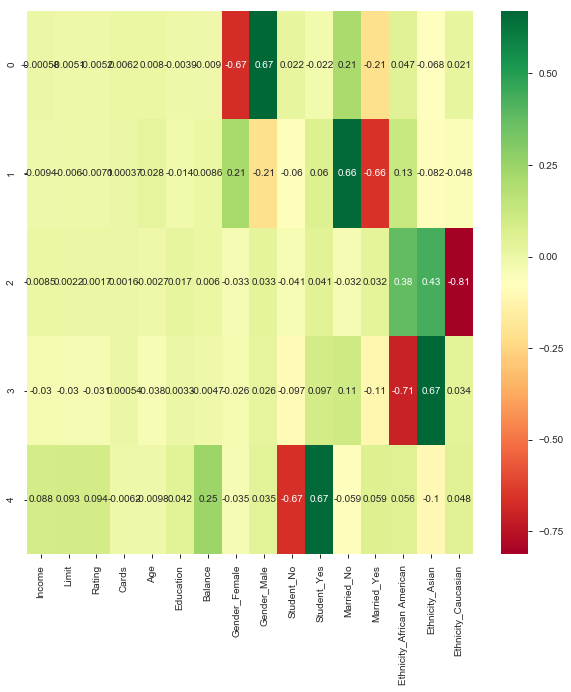

In [27]:
#heatmap of components
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(pca_df, cmap = 'RdYlGn', annot = True)
plt.show();


The Above matix shows the relation between the Optimal Parameters and the Original Variables

Parameter1 is mostly described by Single Men,including all other numerical variables.

Parameter2 is mostly describe by Single Women who are African-American and also including all other numerical variables.

Parameter3 is mostly described by African-American an Asians.

Parameter4 is described by Asians who are mostly students.

Paramter5 is significantly contributed by Students and Income,Rating,Limit and Balance

# Fitting the PCA model on the Dataset

In [28]:
#consider first 5 components as they are explaining 86% of the variation
x_pca=PCA(n_components=5)
df_pca=x_pca.fit_transform(df_final)
df_pca.shape
df_pca

(400, 5)

array([[ 0.55099586, -0.78558213, -0.56591401, -0.03748752, -0.07116739],
       [-0.92589305, -0.26093438,  0.70650811,  0.68660884,  1.1998947 ],
       [ 0.88640648,  0.50894753,  0.62197113,  0.774325  , -0.22399973],
       ...,
       [-0.78611246, -0.3487878 , -0.63001809, -0.11587261, -0.13966422],
       [ 0.55313945, -0.78520128, -0.56451384, -0.03961465, -0.1130771 ],
       [-0.45578331,  0.94693385,  0.54832143,  0.74494569, -0.3221821 ]])

In [29]:
#Transformed features,
df_pca = pd.DataFrame(df_pca,columns = ('p1','p2','p3','p4','p5'))
df_pca.head()
df_pca.shape

,p1,p2,p3,p4,p5
0,0.550996,-0.785582,-0.565914,-0.037488,-0.071167
1,-0.925893,-0.260934,0.706508,0.686609,1.199895
2,0.886406,0.508948,0.621971,0.774325,-0.224000
3,-0.464888,0.921836,0.560771,0.719688,-0.184256
4,0.552251,-0.781010,-0.559271,-0.066102,-0.024316


(400, 5)

instead of 11 we have 5 now.These can be plugged into any further modelling work

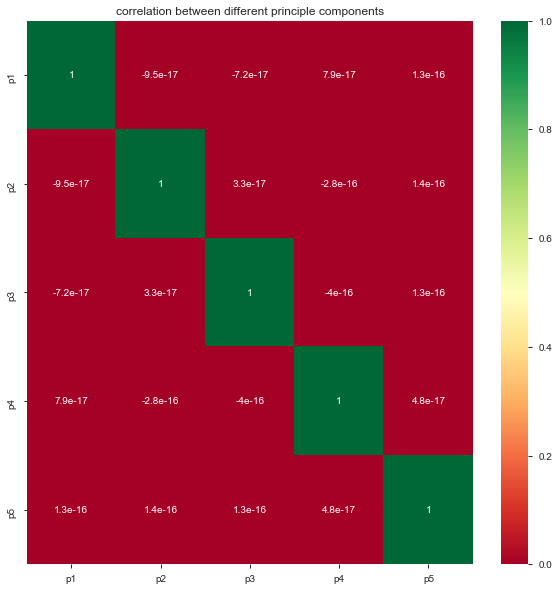

In [30]:
#generate the correlation matrix and correlation heatmap
x =df_pca.corr()
%matplotlib inline
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.title('correlation between different principle components')
plt.show();

# Buiding Clusters on the Optimal Parameters

Finding the Optimal Number of Cluster with least error.

In [31]:
#lets build clusters
from sklearn.cluster import KMeans
num_of_clusters= range(2,10)
error=[]

for num_clusters in num_of_clusters:
    cluster=KMeans(num_clusters)
    cluster.fit(df_pca)
    error.append(cluster.inertia_/100)
    
df1=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})
df1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster_Numbers,Error_Term
0,2,5.154108
1,3,4.002897
2,4,3.222997
3,5,2.784105
4,6,2.286858
5,7,2.035110
6,8,1.661029
7,9,1.394990


Above Table displays, what is the Error term when No. of Cluster is =2,3,4.... so on.

# Elbow Method to find Optimal Number of Clusters

<Figure size 1080x720 with 0 Axes>

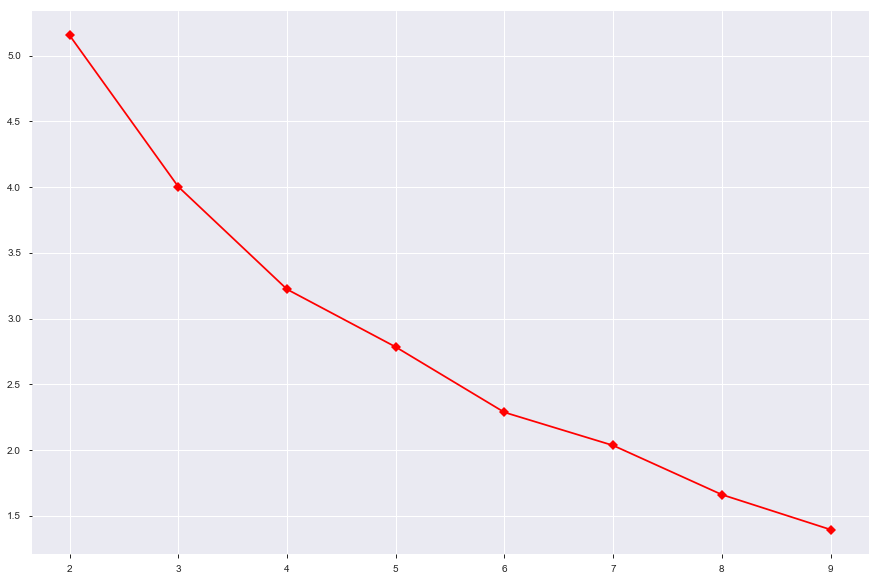

In [32]:
#Find out the right number of clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df1.Cluster_Numbers,df1.Error_Term,marker="D",color='red')
plt.xlabel=('Number of Clusters')
plt.ylabel=('SSE')
plt.title=('Find the optimal number of clusters')
plt.show()

This graph is plot of Error term against no. of clusters. Here the very FIRST BEND in the curve siginifies the Optimal Number of Clusters. From the above plot, we can see it is 3

# Building 3 Clusters

This built on the scaled values

In [33]:
# Build with 3 Clusters
cluster=KMeans(3)

In [34]:
cluster.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:

cluster.labels_

array([2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1,
       2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1,
       1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2,

In [36]:
df_final['cluster']=cluster.labels_

In [37]:
df_final.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,cluster
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,0.166583,0,1,1,0,0,1,0,0,1,2
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,0.451726,1,0,0,1,0,1,0,1,0,0
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,0.290145,0,1,1,0,1,0,0,1,0,1
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,0.482241,1,0,1,0,1,0,0,1,0,1
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,0.165583,0,1,1,0,0,1,0,0,1,2


In [38]:
df_final.tail()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,cluster
395,0.009882,0.248507,0.240720,0.25,0.120000,0.533333,0.280140,0,1,1,0,0,1,0,0,1,2
396,0.017075,0.228442,0.228346,0.50,0.560000,0.800000,0.240120,0,1,1,0,1,0,1,0,0,1
397,0.269560,0.253944,0.256468,0.50,0.586667,0.466667,0.069035,1,0,1,0,0,1,0,0,1,0
398,0.155287,0.127891,0.111361,0.00,0.280000,0.533333,0.000000,0,1,1,0,0,1,0,0,1,2
399,0.047351,0.357559,0.362205,0.50,0.546667,0.133333,0.483242,1,0,1,0,1,0,0,1,0,1


In [39]:
df_final.shape

(400, 17)

# Creating the Cluster Profile

In [40]:
clust_profile=pd.pivot_table(df_final,values=['Income','Limit','Rating','Cards','Age','Education','Balance','Gender_Female','Gender_Male','Student_No','Student_Yes','Married_No','Married_Yes','Ethnicity_African American','Ethnicity_Asian','Ethnicity_Caucasian'],
                                        index='cluster',aggfunc=np.mean)

In [41]:
Roundff_clust_profile=np.round(clust_profile,2)
Roundff_clust_profile

,Age,Balance,Cards,Education,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Female,Gender_Male,Income,Limit,Married_No,Married_Yes,Rating,Student_No,Student_Yes
cluster,,,,,,,,,,,,,,,,
0,0.42,0.28,0.23,0.59,0.18,0.33,0.49,1.00,0.00,0.21,0.31,0,1,0.31,0.90,0.10
1,0.46,0.26,0.25,0.55,0.30,0.21,0.49,0.51,0.49,0.19,0.29,1,0,0.29,0.87,0.13
2,0.42,0.24,0.26,0.55,0.25,0.24,0.51,0.00,1.00,0.20,0.29,0,1,0.29,0.94,0.06


CLUSTER 0 : This cluster consist of Married Women; 18 % are African American, 33% are Asian and 49% are Caucasian.

CLUSTER 1 : This cluster consist of Single 49% of Men and 51% of Women; 30 % are African American, 21% are Asian and 49% are Caucasian.

CLUSTER 2 : This cluster consist of Married Men; 25 % are African American, 24% are Asian and 51% are Caucasian.

In [43]:
df_final.groupby("cluster").size()

cluster
0    128
1    155
2    117
dtype: int64

The above tables shows the numver of people in each of the Cluster